# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import pandas as pd
import numpy as np


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from pandas.plotting import lag_plot

# EDA (pandas-profiling, etc. )
#import pandas_profiling as pp

# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy
import statsmodels

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv
# load all data
df_train = pd.read_csv("Data/train.csv", parse_dates = True)

df_test = pd.read_csv("Data/test.csv", parse_dates = True)

df_stores = pd.read_csv("Data/stores.csv")

df_oil = pd.read_csv("Data/oil.csv", parse_dates = True)

df_transactions = pd.read_csv("Data/transactions.csv", parse_dates = True)

df_events = pd.read_csv("Data/holidays_events.csv", parse_dates = True)



In [3]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [4]:
df_oil["dcoilwtico"].fillna(method="bfill", inplace=True)
df_oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [5]:
df_oil_train = df_oil.loc[0:1205]
df_oil_train


,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1201,2017-08-09,49.59
1202,2017-08-10,48.54
1203,2017-08-11,48.81
1204,2017-08-14,47.59


In [6]:
df_oil_test = df_oil.loc[1206:1217]
df_oil_test

,date,dcoilwtico
1206,2017-08-16,46.80
1207,2017-08-17,47.07
1208,2017-08-18,48.59
1209,2017-08-21,47.39
1210,2017-08-22,47.65
1211,2017-08-23,48.45
1212,2017-08-24,47.24
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46


##  Training data

In [7]:
## Merged train data (store info and oil prices)

df_train1 = pd.merge(df_train, df_stores, on = "store_nbr")
df_train2 = pd.merge(df_train1, df_oil_train, on="date", how="left")
merged_train = pd.merge(df_train2, df_events, on="date", how="left")
merged_train.head()



,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False


In [8]:
merged_train.tail()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [9]:
merged_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type_x       object 
 9   cluster      int64  
 10  dcoilwtico   float64
 11  type_y       object 
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [10]:
merged_train.describe()

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.175822e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,8.481481e+00,6.793162e+01
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,4.649735e+00,2.567813e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.646000e+01
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.338000e+01
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,9.578000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02


In [11]:
merged_train["date"] = pd.to_datetime(merged_train["date"])

In [12]:
#Finding the average sales per day
AverageSales = merged_train.groupby('date').mean()['sales']

AverageSales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 1684, dtype: float64

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [13]:
# drop columns not relevant to analysis

merged_train_update = merged_train.drop(columns=["store_nbr", "state", "type_x", "city", "locale", "locale_name", "description", "transferred"])
merged_train_update.head()

,id,date,family,sales,onpromotion,cluster,dcoilwtico,type_y
0,0,2013-01-01,AUTOMOTIVE,0.0,0,13,93.14,Holiday
1,1,2013-01-01,BABY CARE,0.0,0,13,93.14,Holiday
2,2,2013-01-01,BEAUTY,0.0,0,13,93.14,Holiday
3,3,2013-01-01,BEVERAGES,0.0,0,13,93.14,Holiday
4,4,2013-01-01,BOOKS,0.0,0,13,93.14,Holiday


In [14]:
# remane columns
merged_train_update.rename(columns = {"cluster":"store_cluster", "dcoilwtico":"oil_price", "type_y":"events"}, inplace=True)
merged_train_update.drop(columns = "id", inplace=True)

In [15]:
#convert date to datetime object for train data
merged_train_update["Year"] = merged_train_update['date'].dt.year
merged_train_update["Month"] = merged_train_update['date'].dt.month
merged_train_update["Week"] = merged_train_update['date'].dt.week
merged_train_update["Day"] = merged_train_update['date'].dt.day
merged_train_update['quarter'] = merged_train_update['date'].dt.quarter 
merged_train_update['week_of_year'] = merged_train_update['date'].dt.isocalendar().week

In [16]:
merged_train_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   family         object        
 2   sales          float64       
 3   onpromotion    int64         
 4   store_cluster  int64         
 5   oil_price      float64       
 6   events         object        
 7   Year           int64         
 8   Month          int64         
 9   Week           int64         
 10  Day            int64         
 11  quarter        int64         
 12  week_of_year   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 317.5+ MB


In [17]:
merged_train_update["events"].replace(to_replace={"Bridge", "Event", "Additional"}, value="Holiday", inplace=True) 
merged_train_update["events"].replace(to_replace={"Work Day", "Transfer"}, value="No holiday", inplace=True)

In [18]:
# reclassification of product family to reduce number of categorical variables to encode

merged_train_update["family"].replace(to_replace={"GROCERY I", "GROCERY II", "EGGS", "PRODUCE", "DAIRY", "BREAD/BAKERY", "DELI", "PREPARED FOODS"}, value="Grocery", inplace=True)
merged_train_update["family"].replace(to_replace={"HOME AND KITCHEN I", "HOME AND KITCHEN II", "HOME APPLIANCES", "HARDWARE", "PLAYERS AND ELECTRONICS"}, value="HOME AND KITCHEN", inplace=True)
merged_train_update["family"].replace(to_replace={"MEATS", "POULTRY", "SEAFOOD"}, value="FROZEN FOODS", inplace=True)
merged_train_update["family"].replace(to_replace={"HOME CARE", "LAWN AND GARDEN", "CLEANING"}, value="HOME CARE AND GARDEN", inplace=True)
merged_train_update["family"].replace(to_replace={"BEAUTY", "BABY CARE", "LADIESWEAR", "LINGERIE", "PERSONAL CARE"}, value="BEAUTY AND FASHION", inplace=True)
merged_train_update["family"].replace(to_replace={"LIQUOR,WINE,BEER", "BEVERAGES"}, value="BEVERAGES AND LIQUOR", inplace=True)
merged_train_update["family"].replace(to_replace={"MAGAZINES", "BOOKS", "CELEBRATION"}, value="SCHOOL AND OFFICE SUPPLIES", inplace=True)


## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [19]:
merged_train_update.isna().sum()

date                   0
family                 0
sales                  0
onpromotion            0
store_cluster          0
oil_price         878526
events           2551824
Year                   0
Month                  0
Week                   0
Day                    0
quarter                0
week_of_year           0
dtype: int64

In [20]:
merged_train_update["oil_price"].fillna(method="bfill", inplace=True)

In [21]:
merged_train_update["events"].fillna("No holiday", inplace=True)

In [22]:
merged_train_update.isna().sum()

date             0
family           0
sales            0
onpromotion      0
store_cluster    0
oil_price        0
events           0
Year             0
Month            0
Week             0
Day              0
quarter          0
week_of_year     0
dtype: int64

In [23]:
merged_train_update.to_csv (r'MergedData.csv', index = None, header=True) 

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [23]:
#using one hot encoder

from sklearn.preprocessing import OneHotEncoder

cat = ["family", "events"]
cat_train_encoder = OneHotEncoder()

# Fit and transform the data using the one-hot encoder
encoded_train_features = cat_train_encoder.fit_transform(merged_train_update[cat])

encoded_train_features

<3054348x11 sparse matrix of type '<class 'numpy.float64'>'
	with 6108696 stored elements in Compressed Sparse Row format>

In [24]:
#encoded categories

cat_train_encoder.categories_

[array(['AUTOMOTIVE', 'BEAUTY AND FASHION', 'BEVERAGES AND LIQUOR',
        'FROZEN FOODS', 'Grocery', 'HOME AND KITCHEN',
        'HOME CARE AND GARDEN', 'PET SUPPLIES',
        'SCHOOL AND OFFICE SUPPLIES'], dtype=object),
 array(['Holiday', 'No holiday'], dtype=object)]

In [25]:
encoded_train_features.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [26]:
df_encoded_train_features = pd.DataFrame(encoded_train_features.toarray(), columns=cat_train_encoder.get_feature_names(cat))
df_encoded_train_features

,family_AUTOMOTIVE,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3054344,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3054345,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3054346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [27]:
# Concatenate the encoded columns with the original data
merged_train_encoded = pd.concat([merged_train_update.reset_index(drop=True), df_encoded_train_features], axis=1)

In [28]:
merged_train_encoded.head()

,date,family,sales,onpromotion,store_cluster,oil_price,events,Year,Month,Week,...,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,2013-01-01,AUTOMOTIVE,0.0,0,13,93.14,Holiday,2013,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2013-01-01,BEAUTY AND FASHION,0.0,0,13,93.14,Holiday,2013,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2013-01-01,BEAUTY AND FASHION,0.0,0,13,93.14,Holiday,2013,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2013-01-01,BEVERAGES AND LIQUOR,0.0,0,13,93.14,Holiday,2013,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013-01-01,SCHOOL AND OFFICE SUPPLIES,0.0,0,13,93.14,Holiday,2013,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
# drop the labels from the train set via the pandas drop function

final_train = merged_train_encoded.drop(columns = ["family", "events"])
final_train

,date,sales,onpromotion,store_cluster,oil_price,Year,Month,Week,Day,quarter,...,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,2013-01-01,0.000,0,13,93.14,2013,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2013-01-01,0.000,0,13,93.14,2013,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2013-01-01,0.000,0,13,93.14,2013,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2013-01-01,0.000,0,13,93.14,2013,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013-01-01,0.000,0,13,93.14,2013,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,438.133,0,6,47.57,2017,8,33,15,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3054344,2017-08-15,154.553,1,6,47.57,2017,8,33,15,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3054345,2017-08-15,2419.729,148,6,47.57,2017,8,33,15,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3054346,2017-08-15,121.000,8,6,47.57,2017,8,33,15,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Test data

In [30]:
df_test1 = pd.merge(df_test, df_stores, on = "store_nbr")
df_test2 = pd.merge(df_test1, df_oil_test, on="date", how="left")
merged_test = pd.merge(df_test2, df_events, on="date", how="left")
merged_test.head()


,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN


In [31]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  int64  
 5   city         28512 non-null  object 
 6   state        28512 non-null  object 
 7   type_x       28512 non-null  object 
 8   cluster      28512 non-null  int64  
 9   dcoilwtico   21384 non-null  float64
 10  type_y       1782 non-null   object 
 11  locale       1782 non-null   object 
 12  locale_name  1782 non-null   object 
 13  description  1782 non-null   object 
 14  transferred  1782 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.5+ MB


In [32]:
merged_test_update = merged_test.drop(columns=["store_nbr", "state", "type_x", "city", "locale", "locale_name", "description", "transferred"])
merged_test_update.head()

,id,date,family,onpromotion,cluster,dcoilwtico,type_y
0,3000888,2017-08-16,AUTOMOTIVE,0,13,46.8,NaN
1,3000889,2017-08-16,BABY CARE,0,13,46.8,NaN
2,3000890,2017-08-16,BEAUTY,2,13,46.8,NaN
3,3000891,2017-08-16,BEVERAGES,20,13,46.8,NaN
4,3000892,2017-08-16,BOOKS,0,13,46.8,NaN


In [33]:
merged_test_update.rename(columns = {"cluster":"store_cluster", "dcoilwtico":"oil_price", "type_y":"events"}, inplace=True)
merged_test_update.drop(columns = "id", inplace=True)

In [34]:
#convert date to datetime object for test data

merged_test_update["date"] = pd.to_datetime(merged_test_update["date"])

merged_test_update["Year"] = merged_test_update['date'].dt.year
merged_test_update["Month"] = merged_test_update['date'].dt.month
merged_test_update["Week"] = merged_test_update['date'].dt.week
merged_test_update["Day"] = merged_test_update['date'].dt.day
merged_test_update['quarter'] = merged_test_update['date'].dt.quarter
merged_test_update['week_of_year'] = merged_test_update['date'].dt.isocalendar().week


In [35]:
merged_test_update["family"].replace(to_replace={"GROCERY I", "GROCERY II", "EGGS", "PRODUCE", "DAIRY", "BREAD/BAKERY", "DELI", "PREPARED FOODS"}, value="Grocery", inplace=True)
merged_test_update["family"].replace(to_replace={"HOME AND KITCHEN I", "HOME AND KITCHEN II", "HOME APPLIANCES", "HARDWARE", "PLAYERS AND ELECTRONICS"}, value="HOME AND KITCHEN", inplace=True)
merged_test_update["family"].replace(to_replace={"MEATS", "POULTRY", "SEAFOOD"}, value="FROZEN FOODS", inplace=True)
merged_test_update["family"].replace(to_replace={"HOME CARE", "LAWN AND GARDEN", "CLEANING"}, value="HOME CARE AND GARDEN", inplace=True)
merged_test_update["family"].replace(to_replace={"BEAUTY", "BABY CARE", "LADIESWEAR", "LINGERIE", "PERSONAL CARE"}, value="BEAUTY AND FASHION", inplace=True)
merged_test_update["family"].replace(to_replace={"LIQUOR,WINE,BEER", "BEVERAGES"}, value="BEVERAGES AND LIQUOR", inplace=True)
merged_test_update["family"].replace(to_replace={"MAGAZINES", "BOOKS", "CELEBRATION"}, value="SCHOOL AND OFFICE SUPPLIES", inplace=True)


In [36]:
merged_test_update.isna().sum()

date                 0
family               0
onpromotion          0
store_cluster        0
oil_price         7128
events           26730
Year                 0
Month                0
Week                 0
Day                  0
quarter              0
week_of_year         0
dtype: int64

In [37]:
merged_test_update["oil_price"].fillna(method="bfill", inplace=True)
merged_test_update["events"].fillna("No holiday", inplace=True)

In [38]:
merged_test_update.isna().sum()

date             0
family           0
onpromotion      0
store_cluster    0
oil_price        0
events           0
Year             0
Month            0
Week             0
Day              0
quarter          0
week_of_year     0
dtype: int64

In [39]:
cat_test_encoder = OneHotEncoder()

# Fit and transform the data using the one-hot encoder
encoded_test_features = cat_test_encoder.fit_transform(merged_test_update[cat])

encoded_test_features

<28512x11 sparse matrix of type '<class 'numpy.float64'>'
	with 57024 stored elements in Compressed Sparse Row format>

In [40]:
cat_test_encoder.categories_

[array(['AUTOMOTIVE', 'BEAUTY AND FASHION', 'BEVERAGES AND LIQUOR',
        'FROZEN FOODS', 'Grocery', 'HOME AND KITCHEN',
        'HOME CARE AND GARDEN', 'PET SUPPLIES',
        'SCHOOL AND OFFICE SUPPLIES'], dtype=object),
 array(['Holiday', 'No holiday'], dtype=object)]

In [41]:
encoded_test_features.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
df_encoded_test_features = pd.DataFrame(encoded_test_features.toarray(), columns=cat_test_encoder.get_feature_names(cat))
df_encoded_test_features

,family_AUTOMOTIVE,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
28507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28508,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [43]:
# Concatenate the encoded columns with the original data
merged_test_encoded = pd.concat([merged_test_update.reset_index(drop=True), df_encoded_test_features], axis=1)
merged_test_encoded.head()

,date,family,onpromotion,store_cluster,oil_price,events,Year,Month,Week,Day,...,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,2017-08-16,AUTOMOTIVE,0,13,46.8,No holiday,2017,8,33,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-08-16,BEAUTY AND FASHION,0,13,46.8,No holiday,2017,8,33,16,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017-08-16,BEAUTY AND FASHION,2,13,46.8,No holiday,2017,8,33,16,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2017-08-16,BEVERAGES AND LIQUOR,20,13,46.8,No holiday,2017,8,33,16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017-08-16,SCHOOL AND OFFICE SUPPLIES,0,13,46.8,No holiday,2017,8,33,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [44]:
final_test = merged_test_encoded.drop(columns = ["family", "events"])
final_test

,date,onpromotion,store_cluster,oil_price,Year,Month,Week,Day,quarter,week_of_year,...,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,2017-08-16,0,13,46.80,2017,8,33,16,3,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-08-16,0,13,46.80,2017,8,33,16,3,33,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017-08-16,2,13,46.80,2017,8,33,16,3,33,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2017-08-16,20,13,46.80,2017,8,33,16,3,33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017-08-16,0,13,46.80,2017,8,33,16,3,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,1,6,47.26,2017,8,35,31,3,35,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28508,2017-08-31,0,6,47.26,2017,8,35,31,3,35,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28509,2017-08-31,1,6,47.26,2017,8,35,31,3,35,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28510,2017-08-31,9,6,47.26,2017,8,35,31,3,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [45]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               28512 non-null  datetime64[ns]
 1   onpromotion                        28512 non-null  int64         
 2   store_cluster                      28512 non-null  int64         
 3   oil_price                          28512 non-null  float64       
 4   Year                               28512 non-null  int64         
 5   Month                              28512 non-null  int64         
 6   Week                               28512 non-null  int64         
 7   Day                                28512 non-null  int64         
 8   quarter                            28512 non-null  int64         
 9   week_of_year                       28512 non-null  UInt32        
 10  family_AUTOMOTIVE                 

In [46]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   date                               datetime64[ns]
 1   sales                              float64       
 2   onpromotion                        int64         
 3   store_cluster                      int64         
 4   oil_price                          float64       
 5   Year                               int64         
 6   Month                              int64         
 7   Week                               int64         
 8   Day                                int64         
 9   quarter                            int64         
 10  week_of_year                       UInt32        
 11  family_AUTOMOTIVE                  float64       
 12  family_BEAUTY AND FASHION          float64       
 13  family_BEVERAGES AND LIQUOR        float64       
 14  fa

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [49]:
#from sklearn.preprocessing import StandardScaler
#scaled_data = StandardScaler().fit_transform(final_train)
#train_scaled_data = pd.DataFrame(data = scaled_data )
#train_scaled_data.columns = final_train.columns.values

In [50]:
#pipeline constructor for transformation

#from sklearn.pipeline import Pipeline 
#from sklearn.preprocessing import StandardScaler

#num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])
#train_num_dt = num_pipeline.fit_transform(train_num)

In [51]:
#column transformer for both numerical and categorical attributes

#from sklearn.compose import ColumnTransformer

#num_attribs = list(train_num)

#full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_train) ])


In [52]:
#train_prepared = full_pipeline.fit_transform(merged_train_update)
#train_prepared

# Pivot table

In [47]:
merged_train_update_pivot = pd.pivot_table(data=merged_train_update,index= "date", columns  =["family"], aggfunc = "sum", values = "sales")
merged_train_update_pivot 

family,AUTOMOTIVE,BEAUTY AND FASHION,BEVERAGES AND LIQUOR,FROZEN FOODS,Grocery,HOME AND KITCHEN,HOME CARE AND GARDEN,PET SUPPLIES,SCHOOL AND OFFICE SUPPLIES
date,,,,,,,,,
2013-01-01,0.0,32.0,915.0,183.092999,1193.526000,0.0,188.0,0.0,0.0
2013-01-02,255.0,17880.0,74503.0,43489.486968,285147.930976,67.0,74750.0,0.0,0.0
2013-01-03,161.0,13059.0,54581.0,33126.908099,204505.323025,52.0,55976.0,0.0,0.0
2013-01-04,169.0,11818.0,58963.0,38217.533093,193031.144000,70.0,52191.0,0.0,0.0
2013-01-05,342.0,17468.0,84533.0,41381.342119,263219.779110,98.0,70308.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2017-08-11,441.0,17241.0,200144.0,63008.188997,465034.533025,4440.0,70585.0,587.0,4893.0
2017-08-12,403.0,17336.0,192376.0,47015.644176,452051.890902,4359.0,73605.0,508.0,4976.0
2017-08-13,481.0,19822.0,206648.0,46736.883033,503257.794438,4350.0,79071.0,541.0,4732.0


## Stats model
Goal: Predict sales based on previous sales data

Models to train: ARIMA, moving average, smooth based
Data volume: large
Forecast time and frequency:

## Data

In [48]:
train_stats = merged_train[["date", "store_nbr", "sales"]]
train_stats.head()

,date,store_nbr,sales
0,2013-01-01,1,0.0
1,2013-01-01,1,0.0
2,2013-01-01,1,0.0
3,2013-01-01,1,0.0
4,2013-01-01,1,0.0


In [49]:
test_stats = merged_test[["date", "store_nbr"]]
test_stats.head()

,date,store_nbr
0,2017-08-16,1
1,2017-08-16,1
2,2017-08-16,1
3,2017-08-16,1
4,2017-08-16,1


## Traditional models

In [50]:
modeldata_train = final_train.drop(columns="date")
modeldata_train.head()

,sales,onpromotion,store_cluster,oil_price,Year,Month,Week,Day,quarter,week_of_year,...,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,0.0,0,13,93.14,2013,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0,13,93.14,2013,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0,13,93.14,2013,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0,13,93.14,2013,1,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0,13,93.14,2013,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [51]:
modeldata_test = final_test.drop(columns="date")
modeldata_test.head()

,onpromotion,store_cluster,oil_price,Year,Month,Week,Day,quarter,week_of_year,family_AUTOMOTIVE,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
0,0,13,46.8,2017,8,33,16,3,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,13,46.8,2017,8,33,16,3,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,13,46.8,2017,8,33,16,3,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20,13,46.8,2017,8,33,16,3,33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,13,46.8,2017,8,33,16,3,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [52]:
# Split data into parts
X = modeldata_train.drop(["sales"], axis=1)
y = modeldata_train["sales"]

In [53]:
# Split data into Train Test
X_train, X_val, y_train, y_val = X[:-610870], X[-610870:], y[:-610870], y[-610870:]

In [54]:
X_val.head()

,onpromotion,store_cluster,oil_price,Year,Month,Week,Day,quarter,week_of_year,family_AUTOMOTIVE,family_BEAUTY AND FASHION,family_BEVERAGES AND LIQUOR,family_FROZEN FOODS,family_Grocery,family_HOME AND KITCHEN,family_HOME CARE AND GARDEN,family_PET SUPPLIES,family_SCHOOL AND OFFICE SUPPLIES,events_Holiday,events_No holiday
2443478,0,11,97.14,2013,12,49,5,4,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2443479,0,11,97.14,2013,12,49,5,4,49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2443480,0,11,97.14,2013,12,49,5,4,49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2443481,0,11,97.14,2013,12,49,5,4,49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2443482,0,11,97.14,2013,12,49,5,4,49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y_val.head()

2443478      0.000
2443479      0.000
2443480    706.587
2443481    299.336
2443482     32.000
Name: sales, dtype: float64

# Linear Regressor

In [56]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Make prediction on X_test
lin_pred = linreg_model.predict(X_val)

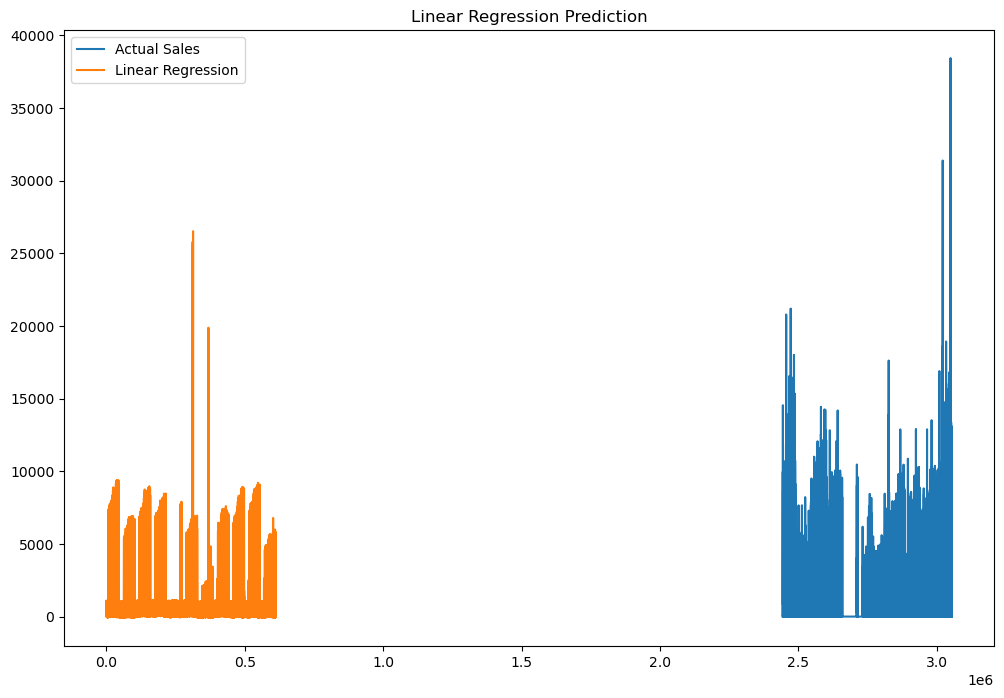

In [58]:
plt.figure(figsize = (12,8))
plt.plot(y_val, label = "Actual Sales")
plt.plot(lin_pred, label = "Linear Regression")
plt.legend(loc = "best")
plt.title("Linear Regression Prediction")
plt.show()

In [59]:
mse = mean_squared_error(y_val, lin_pred )
rmse = np.sqrt(mean_squared_error(y_val, lin_pred )).round(2)

df_model_results = pd.DataFrame([['Linear', mse, rmse]], columns = ["Model", "MSE", "RMSE"])
df_model_results

,Model,MSE,RMSE
0,Linear,950738.158575,975.06


# Decision tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=124)
decision_tree_model = decision_tree.fit(X_train, y_train)

In [61]:
# Make prediction X_validation
predict_tree = decision_tree.predict(X_val)

<BarContainer object of 20 artists>

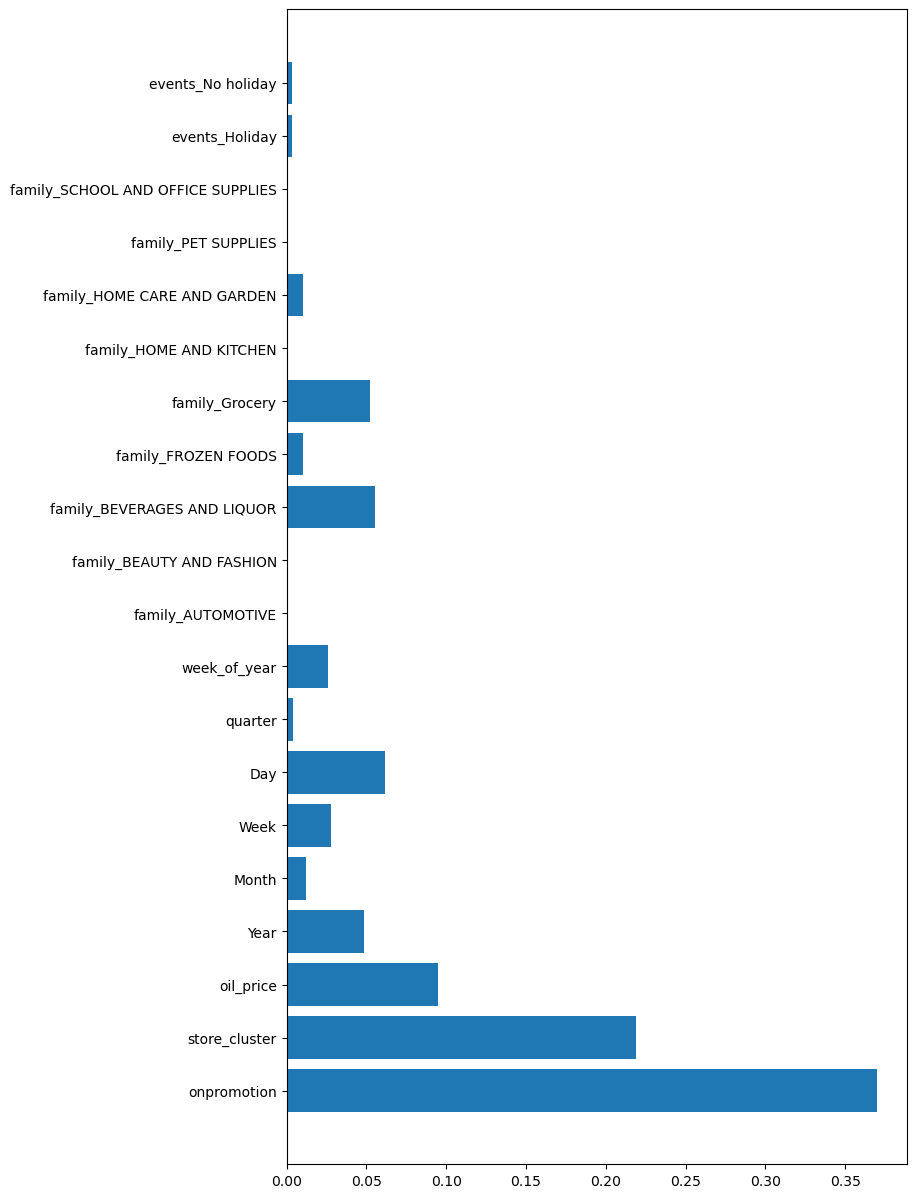

In [62]:
#feature importance

plt.figure(figsize = (8,15))
plt.barh(X_train.columns, decision_tree_model.feature_importances_)

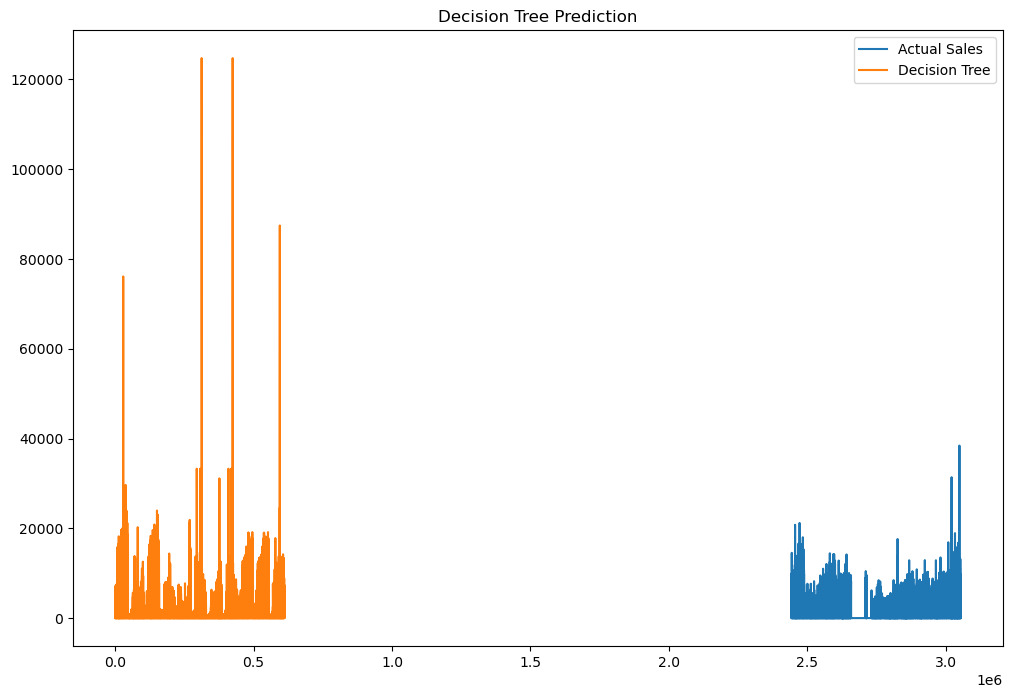

In [63]:
plt.figure(figsize=(12,8))
plt.plot(y_val, label = "Actual Sales")
plt.plot(predict_tree, label = "Decision Tree")
plt.legend(loc = "best")
plt.title("Decision Tree Prediction")
plt.show()

In [64]:
mse = mean_squared_error(y_val, predict_tree )
msle = mean_squared_log_error(y_val, predict_tree)
rmse = np.sqrt(mean_squared_error(y_val, predict_tree )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_val, predict_tree)).round(2)

model_results = pd.DataFrame([["Decision Tree", mse, rmse, msle, rmsle]], columns = ["Model", "MSE","RMSE","MSLE", "RMSLE"])
df_model_result = df_model_results.append(model_results, ignore_index = True)
df_model_result

,Model,MSE,RMSE,MSLE,RMSLE
0,Linear,9.507382e+05,975.06,NaN,NaN
1,Decision Tree,1.108574e+06,1052.89,5.526461,2.35


In [65]:
decision_tree2 = DecisionTreeRegressor(min_samples_leaf=20, random_state=42, criterion="mse", max_depth=4)
decision_tree_model2 = decision_tree2.fit(X_train, y_train)
predict_tree2 = decision_tree2.predict(X_val)

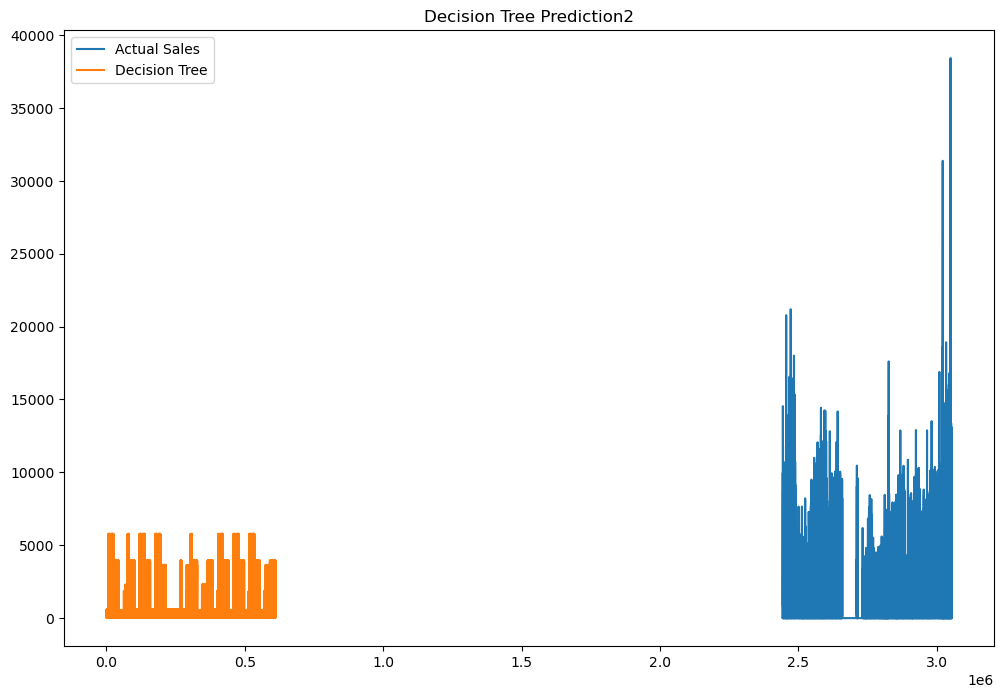

In [66]:
plt.figure(figsize=(12,8))
plt.plot(y_val, label = "Actual Sales")
plt.plot(predict_tree2, label = "Decision Tree")
plt.legend(loc = "best")
plt.title("Decision Tree Prediction2")
plt.show()

In [67]:
mse = mean_squared_error(y_val, predict_tree2)
msle = mean_squared_log_error(y_val, predict_tree2)
rmse = np.sqrt(mean_squared_error(y_val, predict_tree2)).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_val, predict_tree2)).round(2)

model_results = pd.DataFrame([["Decision Tree2", mse, rmse, msle, rmsle]], columns = ["Model", "MSE","RMSE","MSLE", "RMSLE"])
df_models_results = df_model_result.append(model_results, ignore_index = True)
df_models_results

,Model,MSE,RMSE,MSLE,RMSLE
0,Linear,9.507382e+05,975.06,NaN,NaN
1,Decision Tree,1.108574e+06,1052.89,5.526461,2.35
2,Decision Tree2,8.318049e+05,912.03,8.727824,2.95


# Stochastic gradient model

In [68]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

rng = np.random.RandomState(0)
sgd = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)) 
sgd_model = sgd.fit(X_train, y_train)

In [69]:
# Make prediction on X_validation

sgd_predict = sgd.predict(X_val)

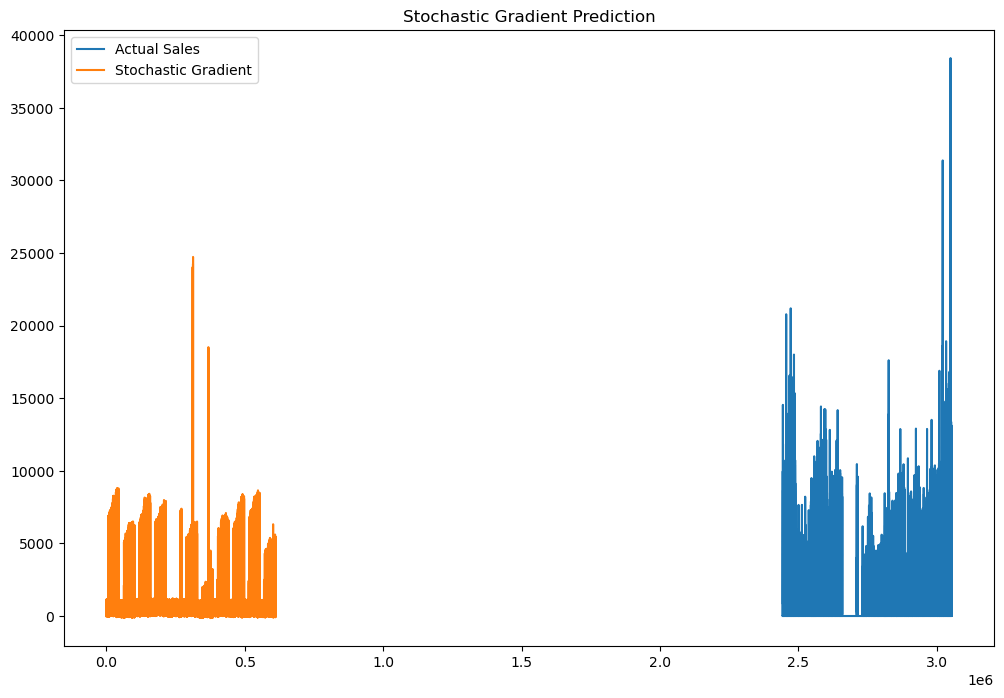

In [70]:
plt.figure(figsize=(12,8))
plt.plot(y_val, label = "Actual Sales")
plt.plot(sgd_predict, label = "Stochastic Gradient")
plt.legend(loc = "best")
plt.title("Stochastic Gradient Prediction")
plt.show()

In [71]:
mse = mean_squared_error(y_val, sgd_predict )
# msle = mean_squared_log_error(y_val, sgd_predict)
rmse = np.sqrt(mean_squared_error(y_val, sgd_predict)).round(2)
#rmsle = np.sqrt(mean_squared_log_error(y_val, sgd_predict)).round(2)

model_results = pd.DataFrame([["SGD Regressor", mse, rmse]], columns = ["Model", "MSE", "RMSE"])
df_models_results = df_models_results.append(model_results, ignore_index = True)
df_models_results

,Model,MSE,RMSE,MSLE,RMSLE
0,Linear,9.507382e+05,975.06,NaN,NaN
1,Decision Tree,1.108574e+06,1052.89,5.526461,2.35
2,Decision Tree2,8.318049e+05,912.03,8.727824,2.95
3,SGD Regressor,9.460606e+05,972.66,NaN,NaN


## Xg Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
xgc = GradientBoostingRegressor(n_estimators=500, max_depth=5, random_state=42) 
xg_boost = xgc.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
xg_boost_pred  = xgc.predict(X_val)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_val, label = "Actual Sales")
plt.plot(xg_boost_pred, label = "xg_boostPrediction")
plt.legend(loc = "best")
plt.title("Gradient Boosting Regressor Prediction")
plt.show()

In [ ]:
mse = mean_squared_error(y_val, xg_boost_pred)
#msle = mean_squared_log_error(y_val, xg_boost_pred)
rmse = np.sqrt(mean_squared_error(y_val, xg_boost_pred)).round(2)
#rmsle = np.sqrt(mean_squared_log_error(y_val, xg_boost_pred)).round(2)

model_results = pd.DataFrame([["Xg boost", mse, rmse]], columns = ["Model", "MSE", "RMSE"])
df_models_results = df_m odels_results.append(model_results, ignore_index = True)
df_models_results

## # Hyperparameter Tuning

Cross validation

In [72]:
backtests = {
    1: ('2017-07-01', '2017-07-15'),
    2: ('2017-07-15', '2017-07-30'),
    3: ('2017-08-01', '2017-08-15')
}

In [73]:
# Backtests with Decision Tree
scores_mse = {}
scores_msle = {}
scores_rmse = {}
scores_rmsle = {}

for idx, period in enumerate(backtests):
    decision_tree = DecisionTreeRegressor()
    
    _train = final_train[final_train['date'] < backtests[period][0]]
    _test = final_train[(final_train['date'] >= backtests[period][0]) & (final_train['date'] <= backtests[period][1])]
    
    Xtrain, ytrain = _train.drop(["sales", "date"], axis=1), _train.sales
    Xtest, ytest = _test.drop(["sales", "date"], axis=1), _test.sales
    
    decision_tree_model = decision_tree.fit(Xtrain, ytrain)
    
    y_predict = decision_tree_model.predict(X_val)
    
    scores_mse[period] = mean_squared_error(y_val, y_predict )
    scores_msle[period] = mean_squared_log_error(y_val, y_predict)
    scores_rmse[period] = np.sqrt(mean_squared_error(y_val, y_predict))
    scores_rmsle[period] = np.sqrt(mean_squared_log_error(y_val, y_predict))
     

In [74]:
scores_mse, scores_msle, scores_rmse, scores_rmsle

({1: 353497.1992836284, 2: 339544.23527693585, 3: 332112.13414914405},
 {1: 4.649178650875395, 2: 4.639675376829661, 3: 4.637323467304081},
 {1: 594.5563045529232, 2: 582.7042434004886, 3: 576.2917092490088},
 {1: 2.1561954111061907, 2: 2.153990570274081, 3: 2.153444558678974})

## Predict on test data

In [75]:
# Make prediction of test data using the best model
predicted_values = decision_tree_model.predict(modeldata_test)
modeldata_test['sales'] = predicted_values

In [76]:
# Save sample submission
modeldata_test[["Year", "Month", "Day", "sales"]].to_csv('submission.csv', index=False)